# Analysis of the Project CSV Data

## Load Data from CSV and Initialize

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

projects = pd.read_csv('result/JavaProjectSample.csv')

# Drop data with < 100 of code, and no commits
projects = projects[projects['commits'] > 0]
projects = projects[projects['lines_of_code'] > 100]

projects['comment_density'] = projects['lines_of_comments'] / projects['lines_of_code']
projects['popularity'] = [('High' if x >= 1000 else ('Mid' if x >= 100 else 'Low')) for x in projects['stars']]

sns.set(style='white')

projects.describe()

,size,stars,watchers,forks,commits,authors,lines_of_code,lines_of_comments,lines_blank,src_files,src_file_size,comment_size,doc_comment,impl_comment,comment_density
count,8.900000e+02,890.000000,890.000000,890.000000,890.000000,890.000000,8.900000e+02,8.900000e+02,8.900000e+02,890.0,890.0,890.0,890.0,890.0,890.000000
mean,7.882403e+04,1611.795506,1611.795506,543.129213,5980.604494,134.691011,1.070375e+05,4.065486e+04,2.174275e+04,-1.0,-1.0,-1.0,-1.0,-1.0,0.324489
std,1.842682e+05,4010.027223,4010.027223,1432.156021,21482.453579,242.949161,2.990547e+05,1.802206e+05,6.170692e+04,0.0,0.0,0.0,0.0,0.0,0.243780
min,4.620000e+02,0.000000,0.000000,0.000000,502.000000,1.000000,1.020000e+02,4.000000e+00,2.100000e+01,-1.0,-1.0,-1.0,-1.0,-1.0,0.000815
25%,5.979500e+03,16.000000,16.000000,11.000000,920.250000,23.000000,1.187850e+04,2.596750e+03,2.511000e+03,-1.0,-1.0,-1.0,-1.0,-1.0,0.165100
50%,2.072350e+04,304.000000,304.000000,111.000000,1960.500000,62.000000,2.982450e+04,8.089000e+03,6.337000e+03,-1.0,-1.0,-1.0,-1.0,-1.0,0.281103
75%,6.836600e+04,1467.000000,1467.000000,458.750000,4766.000000,149.500000,8.290475e+04,2.625250e+04,1.670700e+04,-1.0,-1.0,-1.0,-1.0,-1.0,0.435733
max,2.389684e+06,48989.000000,48989.000000,19706.000000,550545.000000,3972.000000,5.015770e+06,4.358214e+06,1.089598e+06,-1.0,-1.0,-1.0,-1.0,-1.0,3.156340


## Comment Density Analysis

Overall Correlation:  0.8777017915421321
Correlation in High: 0.9087451418299511
Correlation in Low: 0.84504661752268
Correlation in Mid: 0.8780217839157575


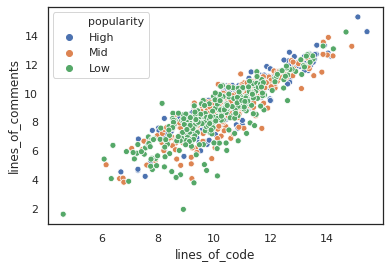

In [15]:
def analyze_correlation(x, y, types):
    type_set = set(types)
    print('Overall Correlation: ', np.corrcoef(x, y)[0][1])
    for t in type_set:
        x1 = [val for idx, val in x.items() if types[idx] == t]
        y1 = [val for idx, val in y.items() if types[idx] == t]
        print('Correlation in {}:'.format(t), np.corrcoef(x1, y1)[0][1])
    sns.scatterplot(x, y, hue=types)
    
analyze_correlation(x=np.log1p(projects['lines_of_code']), y=np.log1p(projects['lines_of_comments']), types=projects['popularity'])

Overall Correlation:  0.06527339043917571
Correlation in High: -0.0269593817932437
Correlation in Low: -0.05428248649107892
Correlation in Mid: 0.06468668574960616


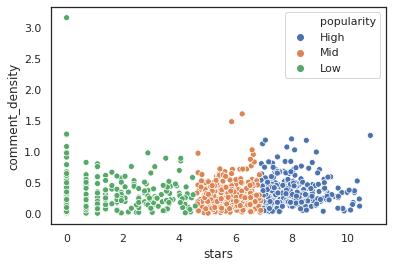

In [16]:
analyze_correlation(x=np.log1p(projects['stars']), y=projects['comment_density'], types=projects['popularity'])

Overall Correlation:  0.06993783213089849
Correlation in High: 0.05816426358462331
Correlation in Low: 0.03420086290976046
Correlation in Mid: 0.05900776519715332


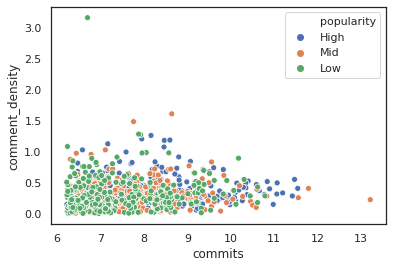

In [17]:
analyze_correlation(x=np.log1p(projects['commits']), y=projects['comment_density'], types=projects['popularity'])

Overall Correlation:  0.0067786205023796335
Correlation in High: 0.08979513608631638
Correlation in Low: -0.08077242821215598
Correlation in Mid: 0.009413464294189695


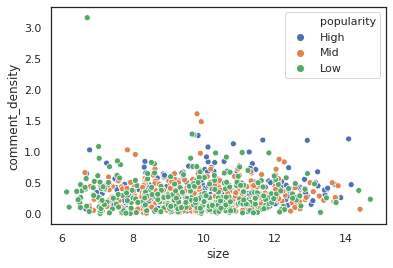

In [18]:
analyze_correlation(x=np.log1p(projects['size']), y=projects['comment_density'], types=projects['popularity'])

Overall Correlation:  0.09584878457252985
Correlation in High: 0.07059582462477673
Correlation in Low: 0.0680345002287765
Correlation in Mid: 0.021889948398822585


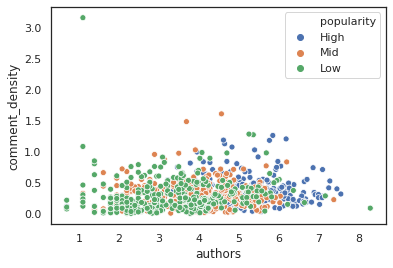

In [19]:
analyze_correlation(x=np.log1p(projects['authors']), y=projects['comment_density'], types=projects['popularity'])

Overall Correlation:  0.09048356566315345
Correlation in High: 0.10558391308452303
Correlation in Low: -0.03544703342555561
Correlation in Mid: 0.11751732675323025


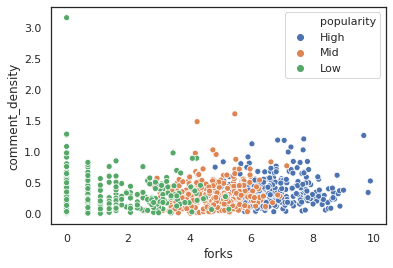

In [20]:
analyze_correlation(x=np.log1p(projects['forks']), y=projects['comment_density'], types=projects['popularity'])